<a href="https://colab.research.google.com/github/shivangisharma2103/Crime_visualization/blob/main/crimep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd drive
%cd My\ Drive
%cd crime

/content/drive
/content/drive/My Drive
/content/drive/My Drive/crime


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from matplotlib import rcParams
from collections import defaultdict
from sklearn.model_selection import train_test_split

In [89]:
import pandas as pd
training_data = pd.read_csv("train.csv")
training_data

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


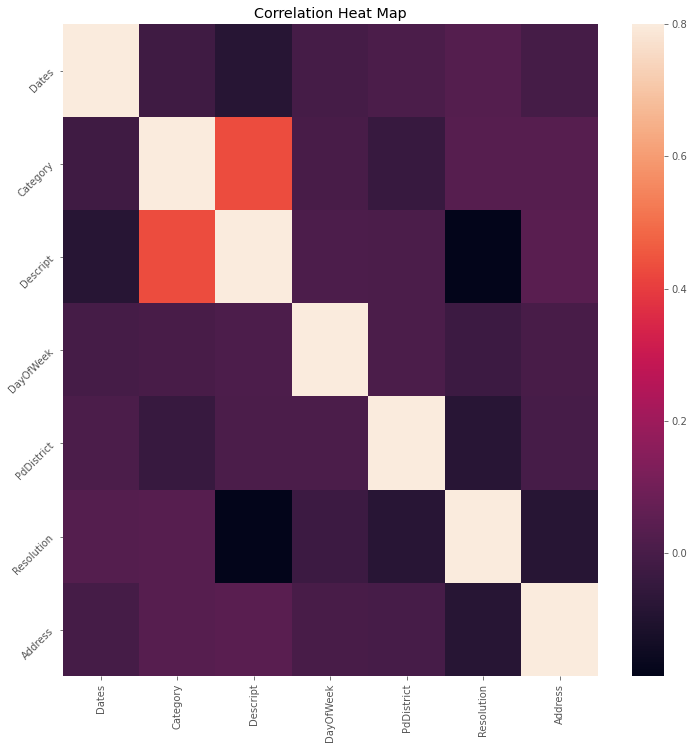

In [91]:
d = defaultdict(LabelEncoder)
sf_encode = training_data.apply(lambda x: d[x.name].fit_transform(x))
sf_encode = sf_encode.drop(['X', 'Y'], axis=1)

corrmat = sf_encode.corr()
f, ax = plt.subplots(figsize=(12, 12))
plot2 =sns.heatmap(corrmat, vmax=.8);
plt.xticks(rotation=90)
plt.yticks(rotation=45)
plot2.axes.set_title('Correlation Heat Map')
plt.show()

LOOKING AT THE CATEGORIES OF CRIMES

In [92]:
training_data.groupby("Category")["Category"].count().sort_values(ascending=False)

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

[Text(0, 0, 'LARCENY/THEFT'),
 Text(0, 0, 'OTHER OFFENSES'),
 Text(0, 0, 'NON-CRIMINAL'),
 Text(0, 0, 'ASSAULT'),
 Text(0, 0, 'DRUG/NARCOTIC'),
 Text(0, 0, 'VEHICLE THEFT'),
 Text(0, 0, 'VANDALISM'),
 Text(0, 0, 'WARRANTS'),
 Text(0, 0, 'BURGLARY'),
 Text(0, 0, 'SUSPICIOUS OCC'),
 Text(0, 0, 'MISSING PERSON'),
 Text(0, 0, 'ROBBERY'),
 Text(0, 0, 'FRAUD'),
 Text(0, 0, 'FORGERY/COUNTERFEITING'),
 Text(0, 0, 'SECONDARY CODES'),
 Text(0, 0, 'WEAPON LAWS'),
 Text(0, 0, 'PROSTITUTION'),
 Text(0, 0, 'TRESPASS'),
 Text(0, 0, 'STOLEN PROPERTY'),
 Text(0, 0, 'SEX OFFENSES FORCIBLE'),
 Text(0, 0, 'DISORDERLY CONDUCT'),
 Text(0, 0, 'DRUNKENNESS'),
 Text(0, 0, 'RECOVERED VEHICLE'),
 Text(0, 0, 'KIDNAPPING'),
 Text(0, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(0, 0, 'RUNAWAY'),
 Text(0, 0, 'LIQUOR LAWS'),
 Text(0, 0, 'ARSON'),
 Text(0, 0, 'LOITERING'),
 Text(0, 0, 'EMBEZZLEMENT'),
 Text(0, 0, 'SUICIDE'),
 Text(0, 0, 'FAMILY OFFENSES'),
 Text(0, 0, 'BAD CHECKS'),
 Text(0, 0, 'BRIBERY'),
 Text(0, 0, 'EX

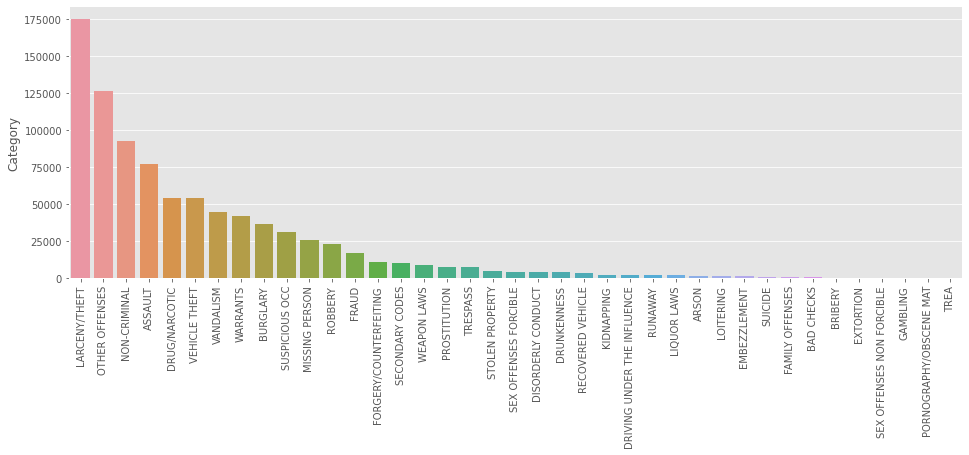

In [93]:
import seaborn as sns
number_of_crimes = training_data.Category.value_counts()
_n_crime_plot = sns.barplot(x=number_of_crimes.index,y=number_of_crimes)
_n_crime_plot.set_xticklabels(number_of_crimes.index,rotation=90)


In [10]:
training_data.groupby("PdDistrict")["PdDistrict"].count().sort_values(ascending=False)

PdDistrict
SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

LISTING OUT THE MOST DANGEROUS DISTRICTS

[Text(0, 0, 'SOUTHERN'),
 Text(0, 0, 'MISSION'),
 Text(0, 0, 'NORTHERN'),
 Text(0, 0, 'BAYVIEW'),
 Text(0, 0, 'CENTRAL'),
 Text(0, 0, 'TENDERLOIN'),
 Text(0, 0, 'INGLESIDE'),
 Text(0, 0, 'TARAVAL'),
 Text(0, 0, 'PARK'),
 Text(0, 0, 'RICHMOND')]

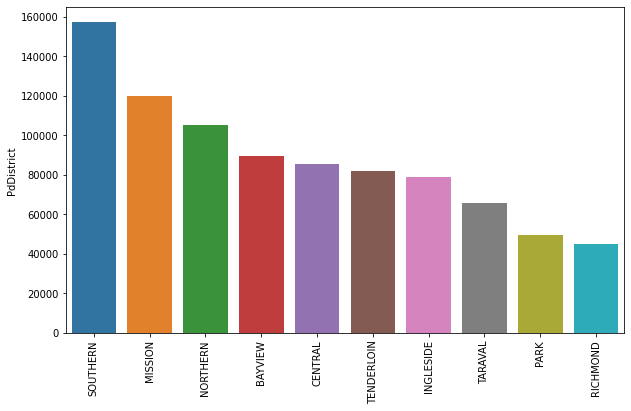

In [34]:
most_dangerous_districts = training_data.PdDistrict.value_counts()
_n_crime_plot = sns.barplot(x=most_dangerous_districts.index,y=most_dangerous_districts)
_n_crime_plot.set_xticklabels(most_dangerous_districts.index,rotation=90)

Heap Map for the number of crimes per disctrict

Text(0.5, 1.0, 'Number of Crimes per District')

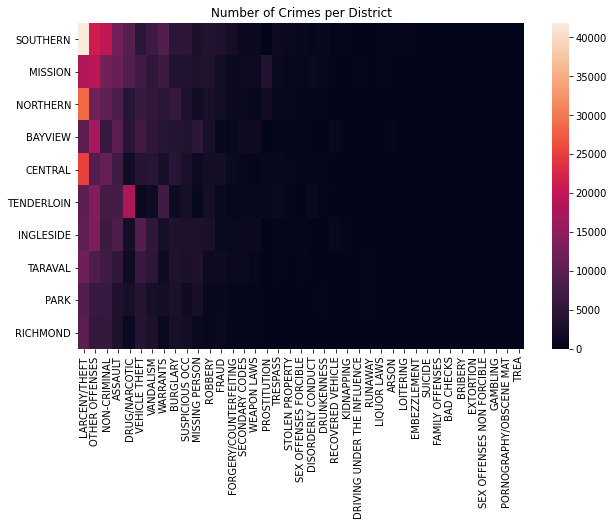

In [35]:
pt = pd.pivot_table(training_data,index="PdDistrict",columns="Category",aggfunc=len,fill_value=0)["Dates"]
_ = pt.loc[most_dangerous_districts.index,number_of_crimes.index]
ax = sns.heatmap(_)
ax.set_title("Number of Crimes per District")

Adding the Hours column in the dataset

In [73]:
training_data['Dates'] = training_data['Dates'].astype('datetime64[ns]')
training_data['Hour']= training_data.Dates.dt.hour


Visualising the crimes with respect to hours in the day

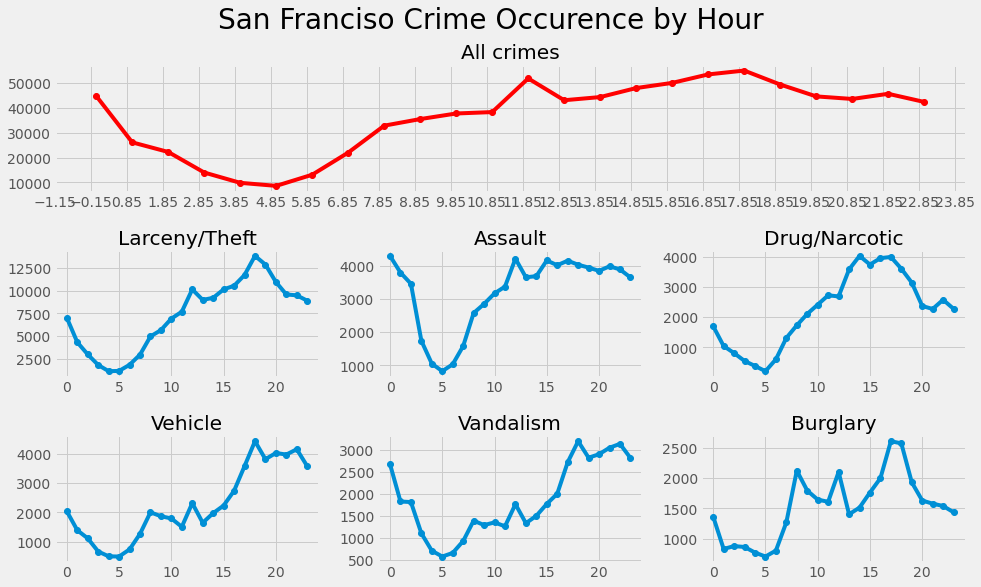

In [68]:
import pylab
import numpy as np

pylab.rcParams['figure.figsize'] = (14.0, 8.0)

larceny = training_data[training_data['Category'] == "LARCENY/THEFT"]
assault = training_data[training_data['Category'] == "ASSAULT"]
drug = training_data[training_data['Category'] == "DRUG/NARCOTIC"]
vehicle = training_data[training_data['Category'] == "VEHICLE THEFT"]
vandalism = training_data[training_data['Category'] == "VANDALISM"]
burglary = training_data[training_data['Category'] == "BURGLARY"]

with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
    ax1.plot(training_data.groupby('Hour').size(), 'ro-')
    ax1.set_title ('All crimes')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    
    ax2 = plt.subplot2grid((3,3), (1, 0))
    ax2.plot(larceny.groupby('Hour').size(), 'o-')
    ax2.set_title ('Larceny/Theft')
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(assault.groupby('Hour').size(), 'o-')
    ax3.set_title ('Assault')
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(drug.groupby('Hour').size(), 'o-')
    ax4.set_title ('Drug/Narcotic')
    
    ax5 = plt.subplot2grid((3,3), (2, 0))
    ax5.plot(vehicle.groupby('Hour').size(), 'o-')
    ax5.set_title ('Vehicle')
    
    ax6 = plt.subplot2grid((3,3), (2, 1))
    ax6.plot(vandalism.groupby('Hour').size(), 'o-')
    ax6.set_title ('Vandalism')
    
    ax7 = plt.subplot2grid((3,3), (2, 2))
    ax7.plot(burglary.groupby('Hour').size(), 'o-')
    ax7.set_title ('Burglary')
  
    pylab.gcf().text(0.5, 1.03, 
                     'San Franciso Crime Occurence by Hour',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout(2)
plt.show()

adding the month colum with respect to the dates

In [94]:
training_data['Dates'] = training_data['Dates'].astype('datetime64[ns]')
training_data['Month']= training_data.Dates.dt.month
training_data['Year']= training_data.Dates.dt.year


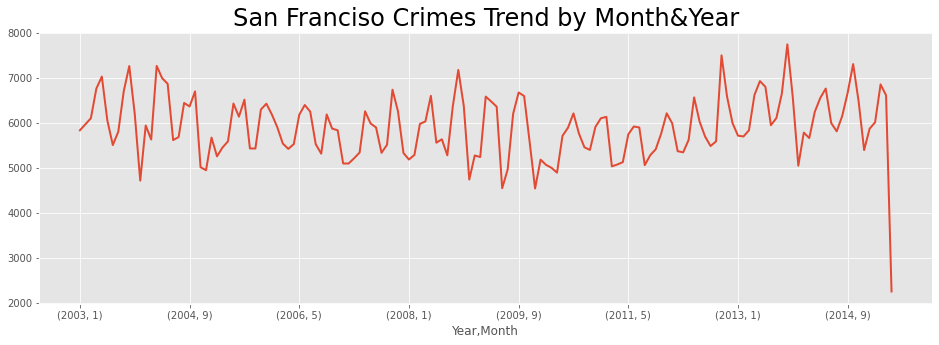

In [95]:
pylab.rcParams['figure.figsize'] = (16.0, 5.0)
yearMonth = training_data.groupby(['Year','Month']).size()
ax = yearMonth.plot(lw=2)
plt.title('San Franciso Crimes Trend by Month&Year', fontsize=24)
plt.show()

AttributeError: ignored

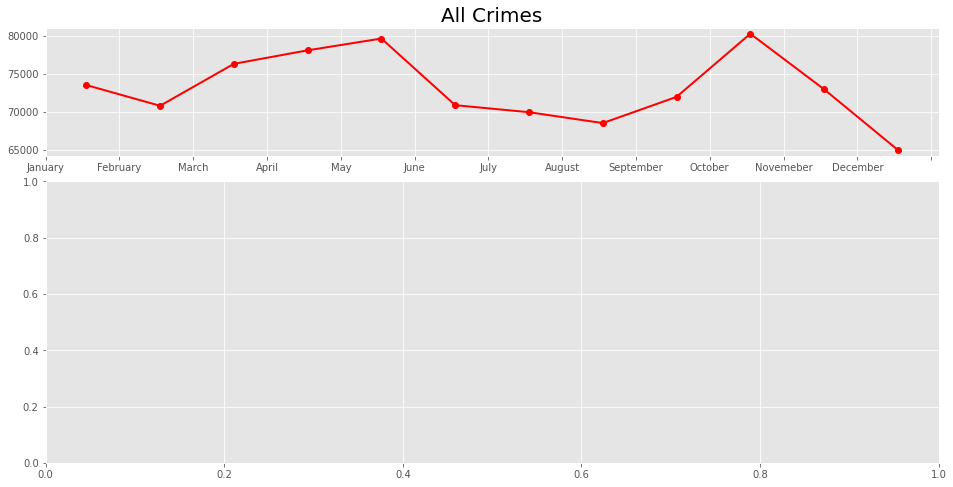

In [86]:
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

monthsIdx = training_data.groupby('Month').size().keys() - 1
monthsLit = ['January', 'February', 
             'March', 'April', 'May', 
             'June', 'July','August', 
             'September', 'October', 'Novemeber', 'December']
occursByMonth = training_data.groupby('Month').size()

# Linear plot for all crimes
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax1.plot(monthsIdx, occursByMonth, 'ro-', linewidth=2)

ax1.set_title ('All Crimes', fontsize=20)
start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 1))
ax1.set_xticklabels(monthsLit)
# ensure that ticks are only at the bottom and left parts of the plot
ax1.get_xaxis().tick_bottom()
ax1.get_yaxis().tick_left()

# Linear normalized plot for 6 top crimes
ax2 = plt.subplot2grid((3,3), (1,0), colspan=3, rowspan=2)

y = np.empty([6,12])
y[0] = larceny.groupby(('Month').size()
y[1] = assault.groupby('Month').size()
y[2] = drug.groupby('Month').size()
y[3] = vehicle.groupby('Month').size()
y[4] = vandalism.groupby('Month').size()
y[5] = burglary.groupby('Month').size()

crimes = ['Larceny/theft', 'Assault', 'Drug', 'Vehicle', 'Vandalism', 'Burglary']
color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b']
for i in range(0,6):
    y[i]= (y[i]-min(y[i]))/(max(y[i])-min(y[i]))  # normalization
    h[i] = ax2.plot(monthsIdx, y[i],'o-', color=color_sequence[i], lw=2)

ax2.set_ylabel("Crime occurences by month, normalized")

ax2.xaxis.set_ticks(np.arange(start, end+2, 1))
ax2.set_xticklabels(monthsLit)

ax2.legend((item[0] for item in h), 
           crimes, 
           bbox_to_anchor=(0.87, 1), loc=2, borderaxespad=0., frameon=False)

pylab.gcf().text(0.5, 1.00, 
            'San Franciso Crime Occurence by Month',
            horizontalalignment='center',
            verticalalignment='top', 
             fontsize = 28)
plt.show()

adding month and day colum as a data preprocessing technique

In [74]:
training_data['Month'] = training_data['Dates'].apply(lambda x : x.split()[0].split('-')[1])
training_data['Day'] = training_data['Dates'].apply(lambda x : x.split()[0].split('-')[2])
time = training_data['Dates'].apply(lambda x : x.split()[1].split(':')[:2])
training_data.head()

AttributeError: ignored

adding time


In [ ]:
training_data['time'] = [int(x[0])*60 + int(x[1]) for x in time]
training_data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,Month,Day,time
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,05,13,1413
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,05,13,1410
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,05,13,1410


Drop the dates colum

In [ ]:
training_data.drop('Dates',axis = 1, inplace = True)
training_data.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,year,Month,Day,time
0,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,05,13,1413
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,05,13,1410
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,05,13,1410


In [ ]:
training_data['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [ ]:
training_data=pd.concat([training_data,pd.get_dummies(training_data['DayOfWeek'])],axis=1)
training_data.drop('DayOfWeek',axis=1,inplace=True)
training_data.head()

,Category,Descript,PdDistrict,Resolution,Address,X,Y,year,Month,Day,time,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,WARRANTS,WARRANT ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433,0,0,0,0,0,0,1
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433,0,0,0,0,0,0,1
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,05,13,1413,0,0,0,0,0,0,1
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,05,13,1410,0,0,0,0,0,0,1
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,05,13,1410,0,0,0,0,0,0,1


In [ ]:
training_data = pd.concat([training_data,pd.get_dummies(training_data['PdDistrict'])],axis = 1)
training_data.drop('PdDistrict',axis = 1, inplace = True)
training_data.head()

,Category,Descript,Resolution,Address,X,Y,year,Month,Day,time,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,WARRANTS,WARRANT ARREST,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,05,13,1433,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,05,13,1413,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,05,13,1410,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,05,13,1410,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
training_data.drop(['Descript','Resolution','Address'],axis = 1, inplace = True)

In [ ]:
training_data.shape

(878049, 24)

In [ ]:
X = training_data.drop('Category',axis = 1)
y = pd.get_dummies(training_data['Category'])
y.head()

,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,EXTORTION,FAMILY OFFENSES,FORGERY/COUNTERFEITING,FRAUD,GAMBLING,KIDNAPPING,LARCENY/THEFT,LIQUOR LAWS,LOITERING,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,PORNOGRAPHY/OBSCENE MAT,PROSTITUTION,RECOVERED VEHICLE,ROBBERY,RUNAWAY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = X.astype(float)
X.head()

,X,Y,year,Month,Day,time,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
0,-122.425892,37.774599,2015.0,5.0,13.0,1433.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-122.425892,37.774599,2015.0,5.0,13.0,1433.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-122.424363,37.800414,2015.0,5.0,13.0,1413.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-122.426995,37.800873,2015.0,5.0,13.0,1410.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-122.438738,37.771541,2015.0,5.0,13.0,1410.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


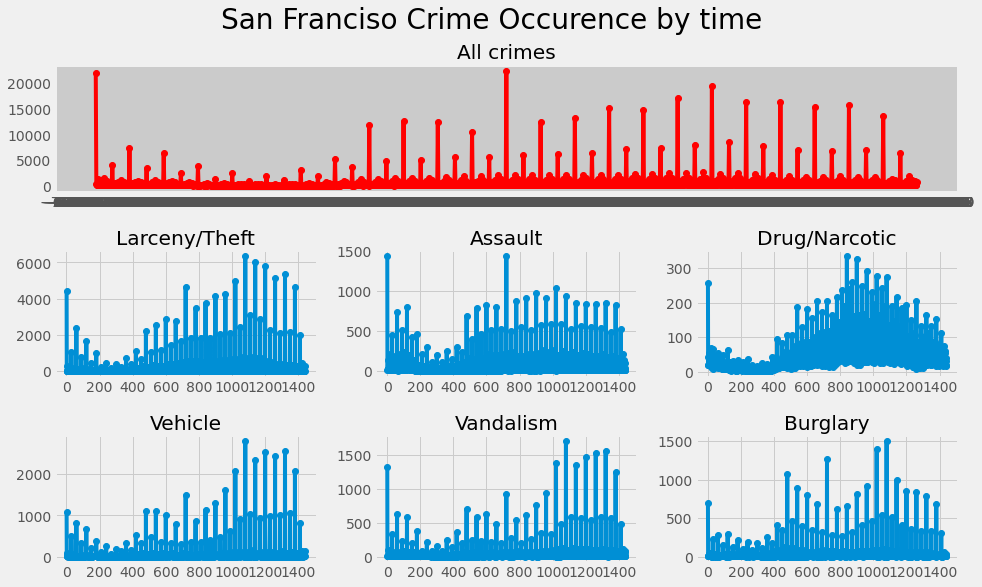

In [ ]:
import matplotlib.pyplot as plt
import pylab
import numpy as np

pylab.rcParams['figure.figsize'] = (14.0, 8.0)

larceny = training_data[training_data['Category'] == "LARCENY/THEFT"]
assault = training_data[training_data['Category'] == "ASSAULT"]
drug = training_data[training_data['Category'] == "DRUG/NARCOTIC"]
vehicle = training_data[training_data['Category'] == "VEHICLE THEFT"]
vandalism = training_data[training_data['Category'] == "VANDALISM"]
burglary = training_data[training_data['Category'] == "BURGLARY"]

with plt.style.context('fivethirtyeight'):
    ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
    ax1.plot(training_data.groupby('time').size(), 'ro-')
    ax1.set_title ('All crimes')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.arange(start, end, 1))
    ax2 = plt.subplot2grid((3,3), (1, 0))
    ax2.plot(larceny.groupby('time').size(), 'o-')
    ax2.set_title ('Larceny/Theft')
    
    ax3 = plt.subplot2grid((3,3), (1, 1))
    ax3.plot(assault.groupby('time').size(), 'o-')
    ax3.set_title ('Assault')
    
    ax4 = plt.subplot2grid((3,3), (1, 2))
    ax4.plot(drug.groupby('time').size(), 'o-')
    ax4.set_title ('Drug/Narcotic')
    
    ax5 = plt.subplot2grid((3,3), (2, 0))
    ax5.plot(vehicle.groupby('time').size(), 'o-')
    ax5.set_title ('Vehicle')
    
    ax6 = plt.subplot2grid((3,3), (2, 1))
    ax6.plot(vandalism.groupby('time').size(), 'o-')
    ax6.set_title ('Vandalism')
    ax7 = plt.subplot2grid((3,3), (2, 2))
    ax7.plot(burglary.groupby('time').size(), 'o-')
    ax7.set_title ('Burglary')
  
    pylab.gcf().text(0.5, 1.03, 
                    'San Franciso Crime Occurence by time',
                     horizontalalignment='center',
                     verticalalignment='top', 
                     fontsize = 28)
    
plt.tight_layout(2)
plt.show()